In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt

% matplotlib inline

C:\Users\HP\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\HP\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\HP\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\HP\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\HP\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\HP\Anaconda3\lib\site

In [2]:
fb_data = pd.read_csv('pseudo_facebook.csv', sep='\s+')
fb_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [3]:
report = pandas_profiling.ProfileReport(fb_data)
report.to_file("fb_data.html")

In [4]:
gender = fb_data.groupby('gender').count()

In [5]:
max_gen = gender[gender.userid.max() == gender.userid].index.values
fb_data.dropna(inplace=True)
fb_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [6]:
report = pandas_profiling.ProfileReport(fb_data)
report.to_file("fb_data_after.html")

In [7]:
cnt_1900,cnt_1920,cnt_1940,cnt_1960,cnt_1980,cnt_2000,other = 0,0,0,0,0,0,0

for i in fb_data['dob_year']:
    if i>=1900 and i<1920:
        cnt_1900 += 1
    elif i>=1920 and i<1940:
        cnt_1920 +=1
    elif i>=1940 and i<1960:
        cnt_1940 +=1
    elif i>=1960 and i<1980:
        cnt_1960 +=1
    elif i>=1980 and i<2000:
        cnt_1980 +=1
    elif i>=2000:
        cnt_2000 +=1
    else:
        other +=1

year_wise = pd.DataFrame({'1900-1920':[cnt_1900], '1920-1940':[cnt_1920], '1940-1960':[cnt_1940], '1960-1980':[cnt_1960], 
                         '1980-2000':[cnt_1980], '2000-more':[cnt_2000]})
year_wise = year_wise.T
year_wise.rename(columns={0:'ppl_count'})

,ppl_count
1900-1920,4515
1920-1940,2388
1940-1960,13940
1960-1980,19468
1980-2000,58031
2000-more,484


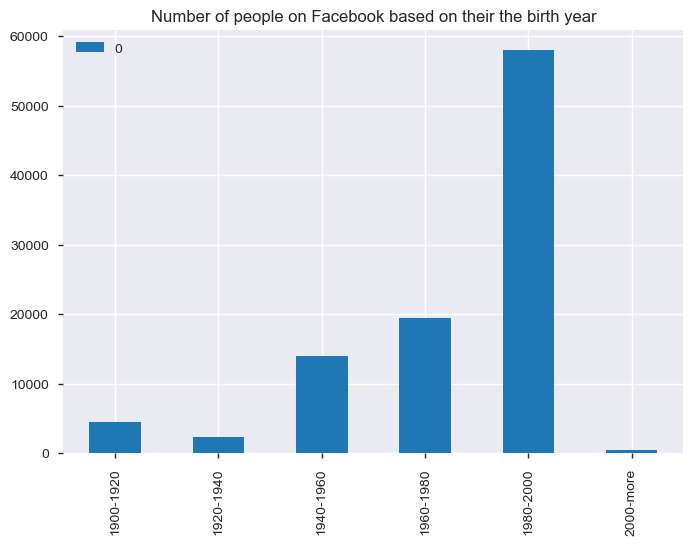

In [8]:
year_wise.plot.bar()
plt.title('Number of people on Facebook based on their the birth year')
plt.legend(loc='upper left')
plt.show()

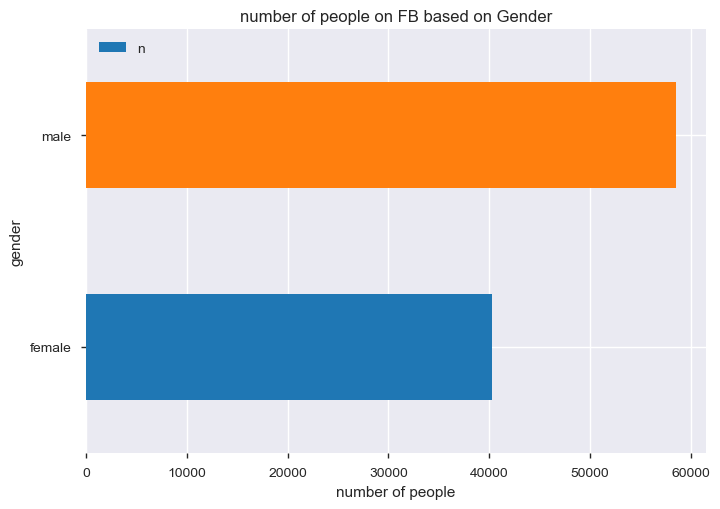

In [9]:
gender.plot.barh(y='userid')
plt.xlabel('number of people')
plt.title('number of people on FB based on Gender')
plt.legend('no ppl',loc='upper left')
plt.show()

In [10]:
age_data = fb_data.groupby('age').mean()
age_data.head()

,userid,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
age,,,,,,,,,,,,,
13,1.604256e+06,13.357438,2000.0,3.723140,192.010331,164.750000,95.611570,201.059917,157.390496,137.128099,84.979339,63.931818,72.411157
14,1.601891e+06,14.688831,1999.0,5.859740,259.681039,251.390130,140.409870,180.560000,146.945455,117.698182,80.856104,62.861818,66.088831
15,1.598801e+06,14.479557,1998.0,6.255636,341.504776,347.780665,175.499809,226.253726,241.622468,150.749331,143.670615,75.504394,97.951853
16,1.592566e+06,14.830201,1997.0,6.338950,367.850616,351.937135,183.366818,209.272521,208.579391,143.857745,126.918341,65.414776,81.661050
17,1.603226e+06,14.702835,1996.0,6.420603,381.942396,350.449253,186.440719,231.832368,313.583054,147.459006,182.395306,84.373057,131.187443


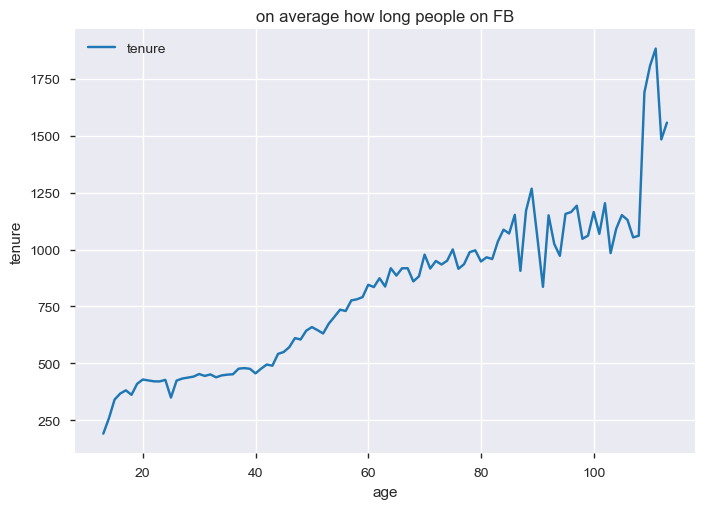

In [11]:
age_data.plot.line(y='tenure')
plt.ylabel('tenure')
plt.title('on average how long people on FB')
plt.show()

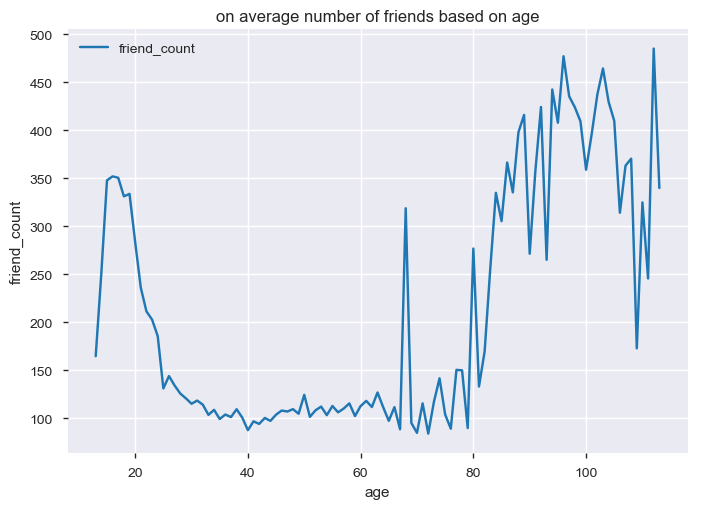

In [12]:
age_data.plot.line(y='friend_count')
plt.ylabel('friend_count')
plt.title('on average number of friends based on age')
plt.show()

In [13]:
data_below_18 = fb_data[fb_data['age']<=18]
data_bw_19_30 = fb_data[(fb_data['age']<=30)&(fb_data['age']>18)]
data_bw_31_60 = fb_data[(fb_data['age']<=60)&(fb_data['age']>30)]
data_bw_61_100 = fb_data[(fb_data['age']<=100)&(fb_data['age']>60)]
data_more_101 = fb_data[fb_data['age']>=101]

In [14]:
data_below_18.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [15]:
data_bw_19_30.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
194,1195657,19,11,1994,11,male,152.0,0,0,0,0,0,0,0,0
195,1837868,19,11,1994,11,male,116.0,0,0,0,0,0,0,0,0
196,1499423,19,28,1994,11,male,33.0,0,0,0,0,0,0,0,0
197,1926687,19,12,1994,11,female,20.0,0,0,0,0,0,0,0,0
198,1684975,19,15,1994,11,female,39.0,0,0,0,0,0,0,0,0


In [16]:
data_bw_31_60.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
947,1337980,31,24,1982,11,female,353.0,0,0,0,0,0,0,0,0
948,1030633,31,14,1982,11,male,128.0,0,0,0,0,0,0,0,0
949,1094447,31,17,1982,11,male,94.0,0,0,0,0,0,0,0,0
950,2115643,31,26,1982,11,male,0.0,0,0,0,0,0,0,0,0
951,1584181,31,6,1982,12,male,280.0,0,0,0,0,0,0,0,0


In [17]:
data_bw_61_100.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
1610,1394579,61,27,1952,12,male,212.0,0,0,0,0,0,0,0,0
1611,1864380,61,19,1952,12,male,209.0,0,0,0,0,0,0,0,0
1619,1825135,61,23,1952,1,male,200.0,0,0,0,0,0,0,0,0
1620,2107908,61,20,1952,2,male,51.0,0,0,0,0,0,0,0,0
1621,1865372,61,23,1952,3,female,357.0,0,0,0,0,0,0,0,0


In [18]:
data_more_101.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
1695,2192316,107,22,1906,5,male,242.0,0,0,0,0,0,0,0,0
1696,2100908,108,26,1905,3,male,109.0,0,0,0,0,0,0,0,0
1778,1973211,108,6,1905,6,male,6.0,0,0,1,1,1,1,0,0
1791,1340376,102,1,1911,1,male,29.0,0,0,2,0,0,0,2,0
3128,1697718,101,9,1912,6,male,151.0,1,0,0,0,0,0,0,0


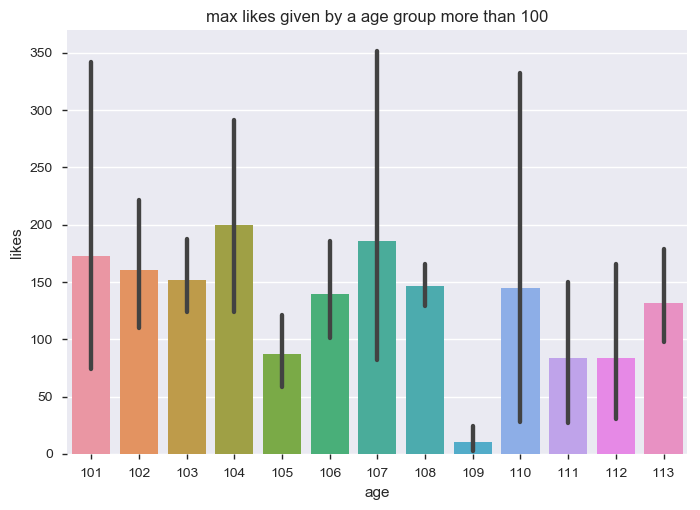

In [19]:
sns.barplot(x='age',y='likes',data=data_more_101)
plt.title('max likes given by a age group more than 100')
plt.show()

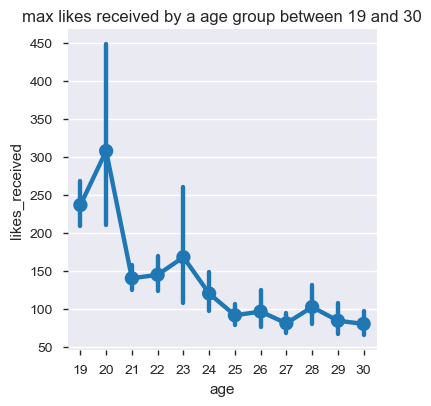

In [20]:
sns.factorplot(x='age', y='likes_received', data=data_bw_19_30)
plt.title('max likes received by a age group between 19 and 30')
plt.show()

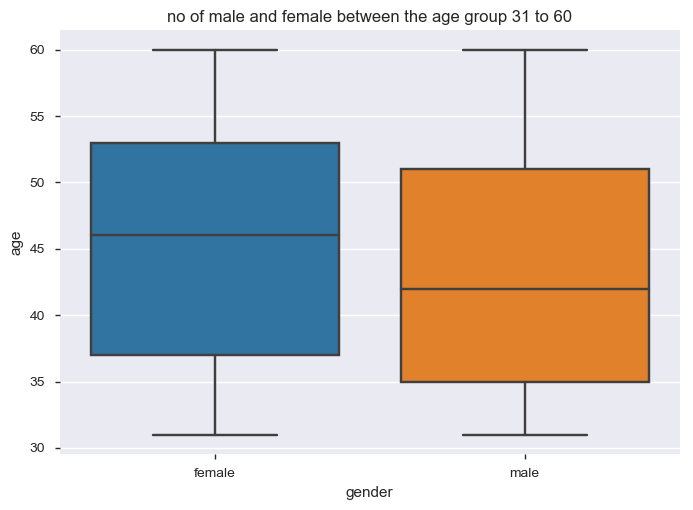

In [21]:
sns.boxplot(x='gender', y='age', data=data_bw_31_60)
plt.title('no of male and female between the age group 31 to 60')
plt.show()

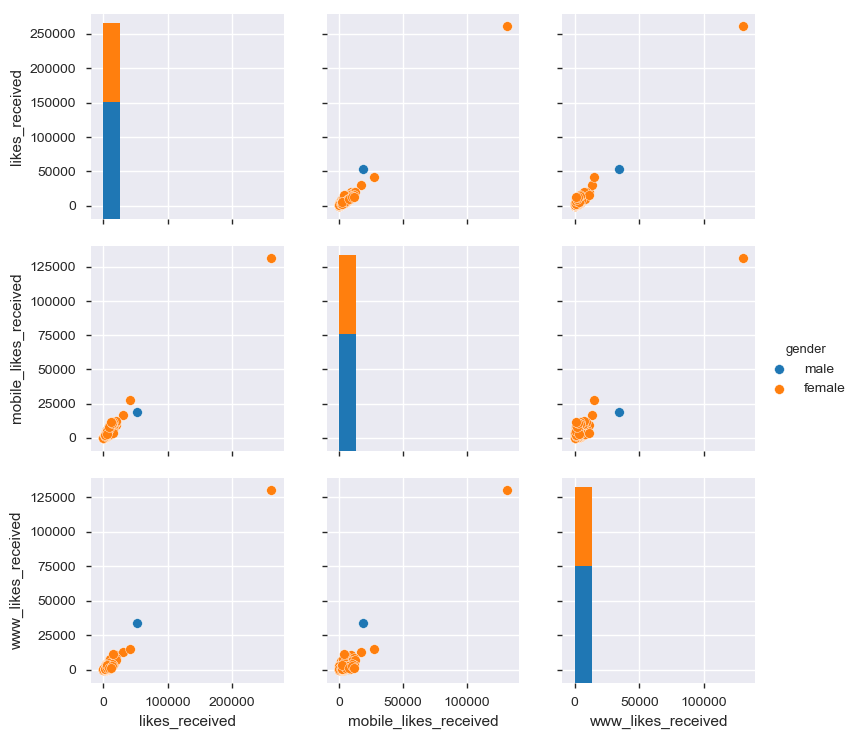

In [22]:
sns.pairplot(data_below_18[['gender','likes_received','mobile_likes_received','www_likes_received']],
             hue='gender', diag_kind="hist")
# The histogram on the diagonal allows us to see the distribution of a single variable 
# while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables
plt.show()

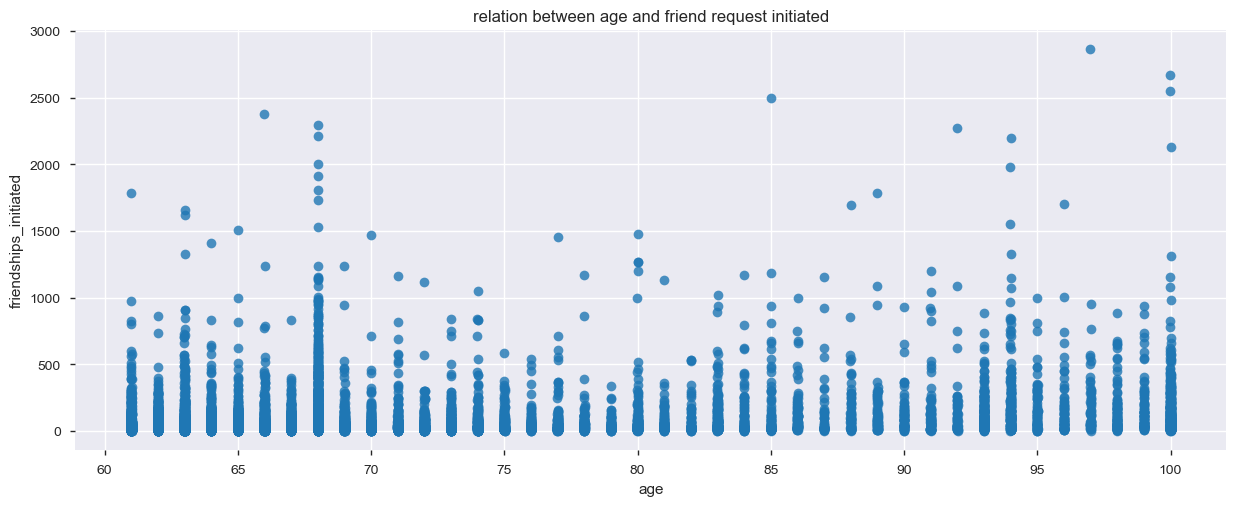

In [23]:
sns.lmplot(x='age', y='friendships_initiated', data=data_bw_61_100,fit_reg=False, aspect=2.5, x_jitter=.01)
plt.title('relation between age and friend request initiated')
plt.show()

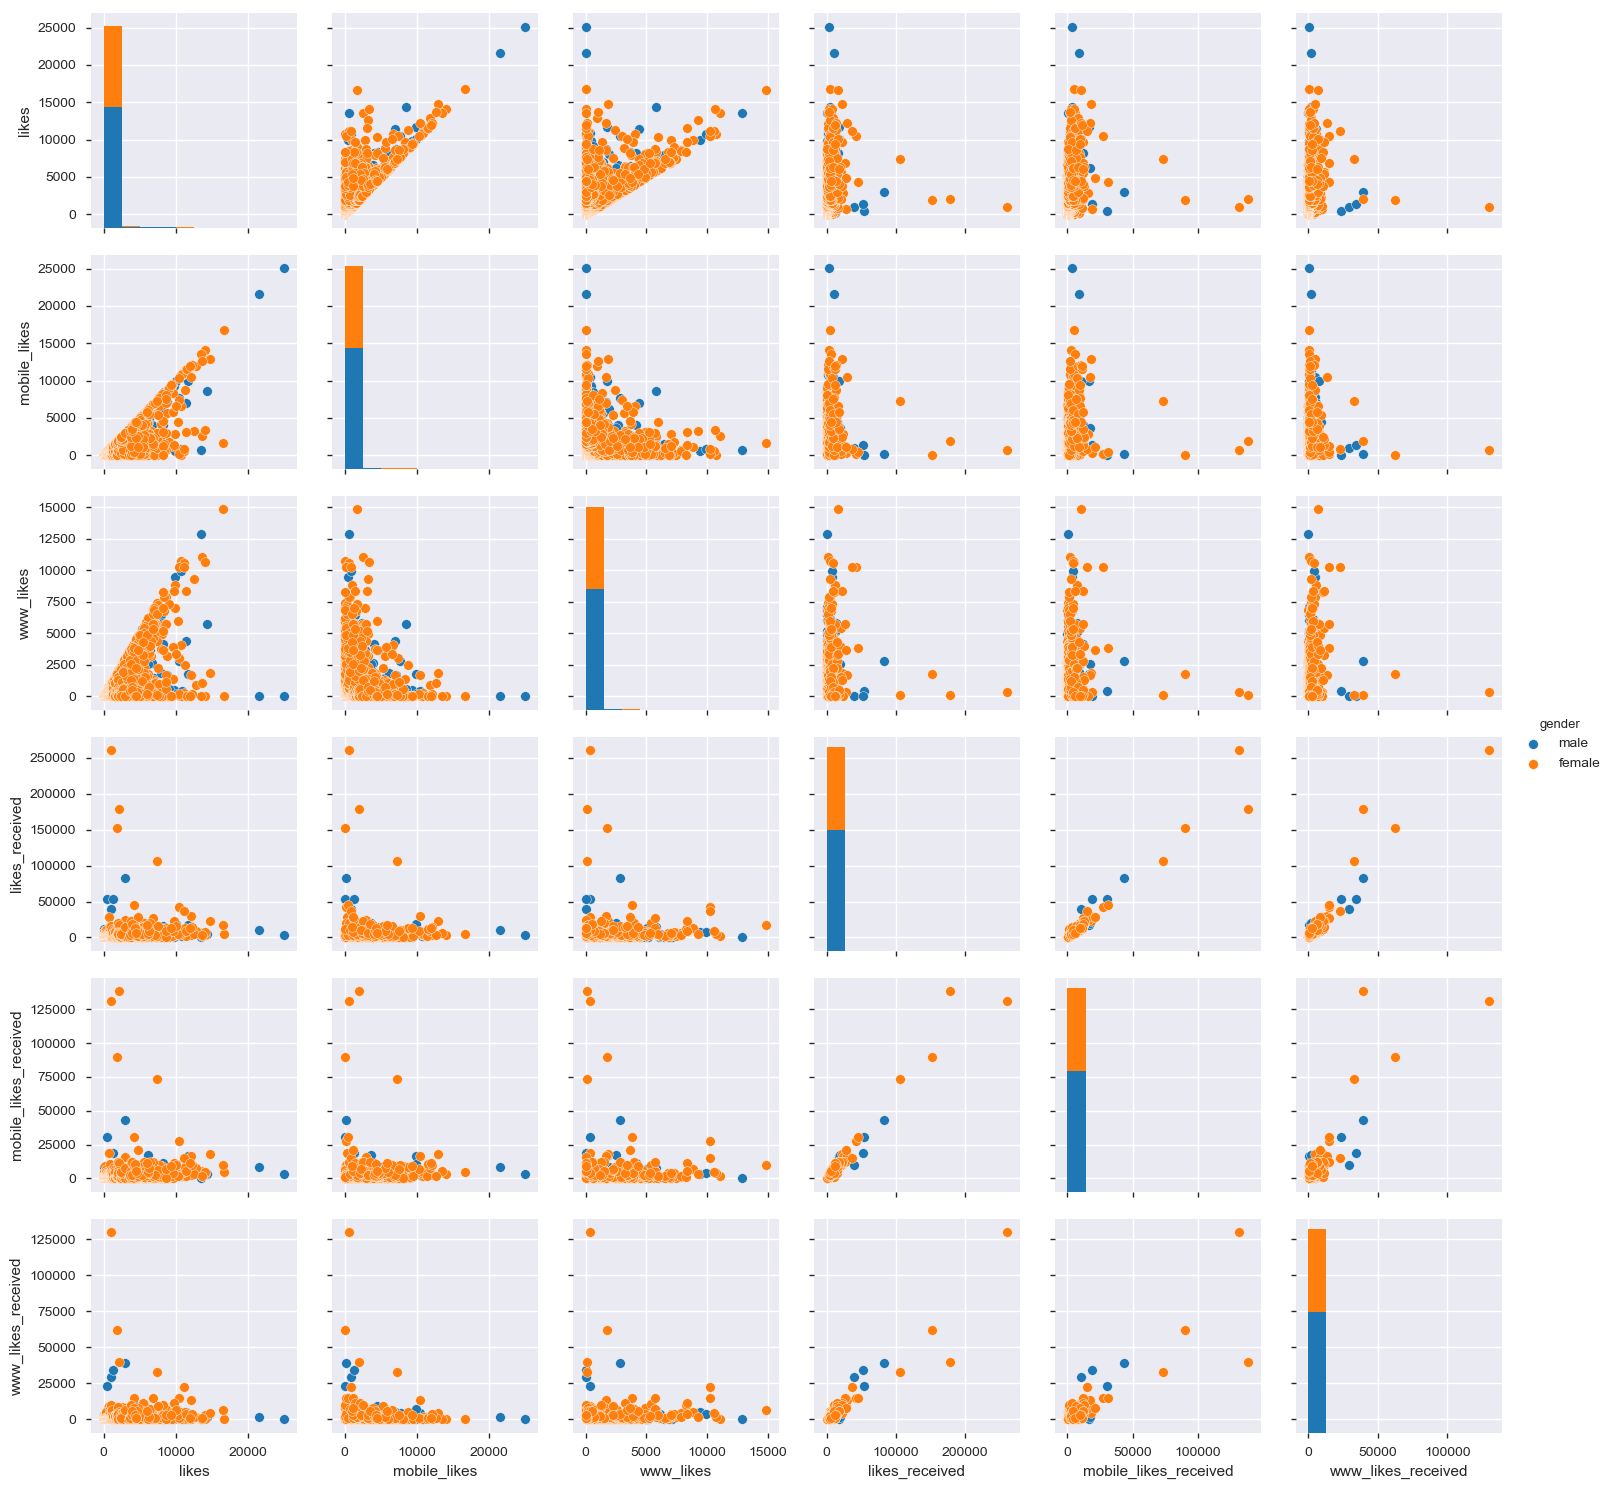

In [24]:
sns.pairplot(fb_data[['gender','likes','mobile_likes','www_likes','likes_received','mobile_likes_received','www_likes_received']]
            , hue='gender', diag_kind="hist")
# The histogram on the diagonal allows us to see the distribution of a single variable 
# while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables
plt.show()

In [25]:
gender_on_likes = fb_data.groupby('gender').sum()
gender_on_likes

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
gender,,,,,,,,,,,,,,
female,64311885168,1588228,605311,79439048,259055,23637151.0,9740073,4584801,10467978,10121203,6960420,5921375,3507554,4199824
male,93520103528,2089349,830938,115820113,362042,29298972.0,9666787,6037023,4959923,3977851,3529747,2391753,1430175,1586098


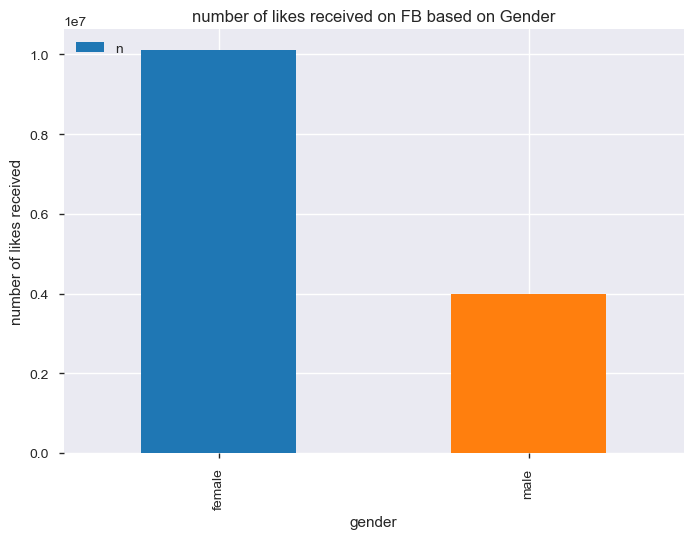

In [26]:
gender_on_likes.plot.bar(y='likes_received')
plt.ylabel('number of likes received')
plt.title('number of likes received on FB based on Gender')
plt.legend('no likes',loc='upper left')
plt.show()

In [27]:
fb_details = pd.read_csv('pseudo_facebook.csv', sep='\s+', parse_dates=[['dob_year','dob_month','dob_day']], 
                         index_col='dob_year_dob_month_dob_day')
#fb_details.rename(index={'dob_year_dob_month_dob_day':'dateOfBirth'},inplace=True)
fb_details.head()

,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
dob_year_dob_month_dob_day,,,,,,,,,,,,
1999-11-19,2094382,14,male,266.0,0,0,0,0,0,0,0,0
1999-11-02,1192601,14,female,6.0,0,0,0,0,0,0,0,0
1999-11-16,2083884,14,male,13.0,0,0,0,0,0,0,0,0
1999-12-25,1203168,14,female,93.0,0,0,0,0,0,0,0,0
1999-12-04,1733186,14,male,82.0,0,0,0,0,0,0,0,0


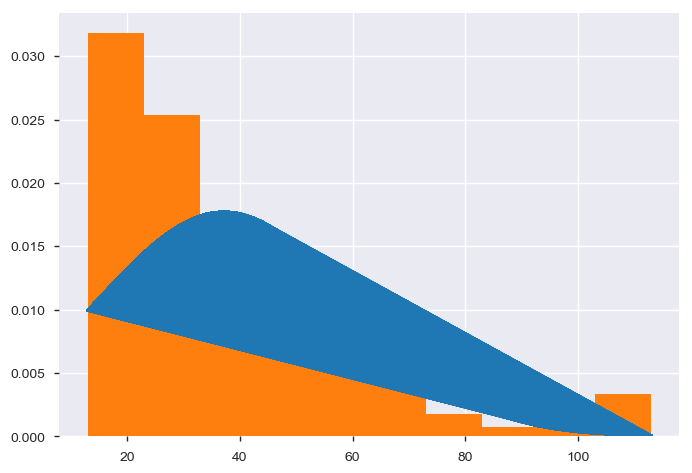

In [35]:
age_mean = np.mean(fb_data['age'])
age_std = np.std(fb_data['age'])
pdf = stats.norm.pdf(fb_data['age'], age_mean, age_std)
plt.plot(fb_data['age'], pdf)
plt.hist(fb_data['age'], density=True)
plt.show()

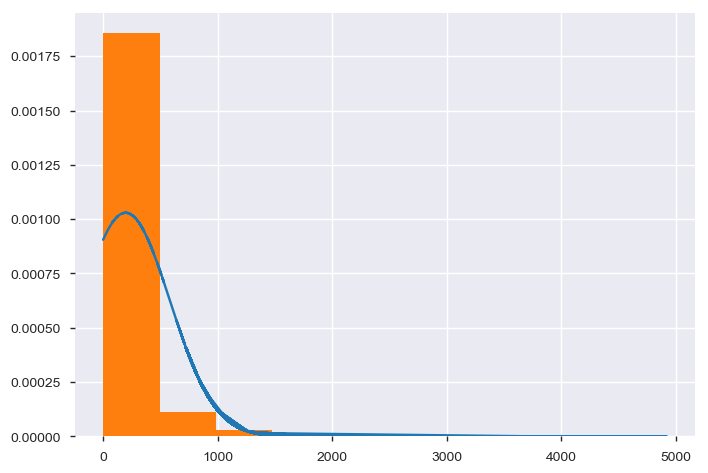

In [36]:
frndcnt_mean = np.mean(fb_data['friend_count'])
frndcnt_std = np.std(fb_data['friend_count'])
pdf = stats.norm.pdf(fb_data['friend_count'], frndcnt_mean, frndcnt_std)
plt.plot(fb_data['friend_count'], pdf)
plt.hist(fb_data['friend_count'], density=True)
plt.show()